# **Health Insurance Price Prediction**

### **Problem Statement**

The goal of this project is to develop a **predictive model** that accurately estimates the **medical insurance costs** for individuals based on various **demographic, lifestyle, and health-related factors**. By applying **machine learning techniques**, we aim to assist **insurance companies** in better understanding their risk profiles and help **individuals gain insights** into how different factors influence their **insurance premiums**.

## **Load Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Load data**

In [3]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Domain Analysis**
The descriptions of the variables based on the insurance dataset:

1. **Age**
   - **Description:** Age of the primary beneficiary covered by health insurance.
   - **Type:** Continuous numerical variable.

2. **Sex**
   - **Description:** Gender of the insurance contractor.
   - **Type:** Categorical variable with two levels: female, male.

3. **BMI (Body Mass Index)**
   - **Description:** Body mass index, which is a measure of body fat based on height and weight.
   - **Type:** Continuous numerical variable.
   - **Ideal Range:** Ideally between 18.5 to 24.9 kg/m².

4. **Children**
   - **Description:** Number of children covered by health insurance or number of dependents.
   - **Type:** Discrete numerical variable.

5. **Smoker**
   - **Description:** Binary indicator if the beneficiary is a smoker.
   - **Type:** Categorical variable with two levels: yes, no.

6. **Region**
   - **Description:** The beneficiary's residential area in the US.
   - **Type:** Categorical variable with four levels: northeast, southeast, southwest, northwest.

7. **Charges**
   - **Description:** Individual medical costs billed by health insurance.
   - **Type:** Continuous numerical variable.

### **Basic Checks**

In [5]:
# check number of rows and columns
data.shape

(1338, 7)

There are **1338 rows** and **7 columns**.

In [ ]:
# print first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# print last 5 rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# check data types
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
# print all columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# print numerical columns
num_data = data.select_dtypes(include=['int64','float64'])
num_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
# print categorical columns
cat_data = data.select_dtypes(include=['object'])
cat_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
# perform statistical analysis
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# perform statistical analysis on categorical data
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# find unique values
for x in cat_data:
  print(x ,'-->', data[x].unique())

sex --> ['female' 'male']
smoker --> ['yes' 'no']
region --> ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# find value_counts
for x in cat_data:
  print(data[x].value_counts())
  print()

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



### **Data Cleaning**

### **Check for Missing values**

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**No missing** values in data.

### **Check for duplicates**

In [ ]:
data.duplicated().sum()

np.int64(1)

There is one duplicate which needs to be dropped.

**Drop duplicates**

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

## **Exploratory Data Analysis**

**Check the distribution of charges**

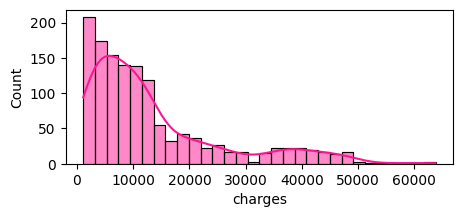

In [7]:
plt.figure(figsize=(5,2))
sns.histplot(data,x='charges',color='deeppink',kde=True)
plt.show()

**Insights**
1. Maximum customers insurance charge is less than 20000.
2. There are few customers whose premium charges are very high like baove 40000.
3. Distribution is right skewed indicating that there are few extreme charges in a data.

**Check distribution of Age with charges**

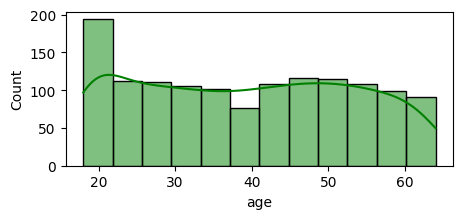

In [6]:
plt.figure(figsize=(5,2))
sns.histplot(data,x='age',kde=True,color='green')
plt.show()

**Check count of male and female**

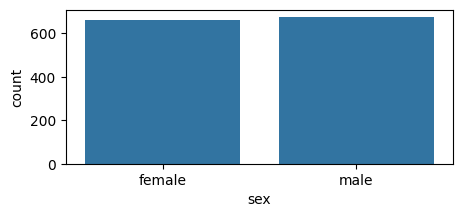

In [ ]:
plt.figure(figsize=(5,2))
sns.countplot(data,x='sex')
plt.show()

**Check count of smokers and non smokers**

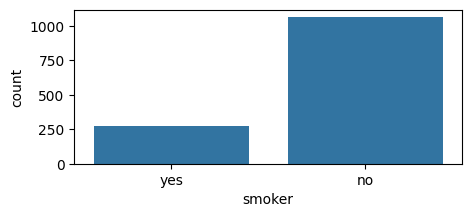

In [ ]:
plt.figure(figsize=(5,2))
sns.countplot(data,x='smoker')
plt.show()

**Check are there outliers in age and charges**

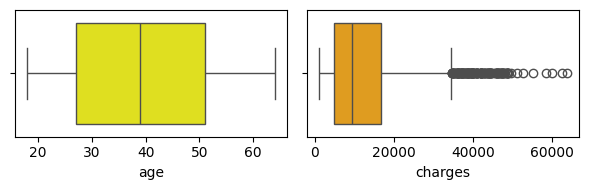

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(6,2))
sns.boxplot(data,x='age',ax=ax[0],color='yellow')
sns.boxplot(data,x='charges',ax=ax[1],color='orange')
plt.tight_layout()

* There are ouliers in charges but no outliers in age.

**Relationship between age and charges**

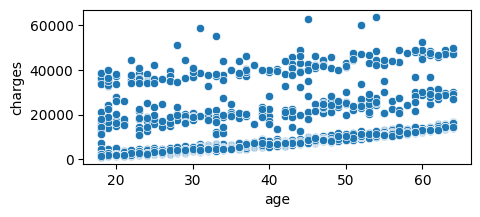

In [ ]:
plt.figure(figsize=(5,2))
sns.scatterplot(data,x='age',y='charges')
plt.show()

**Relationship between bmi and charges**

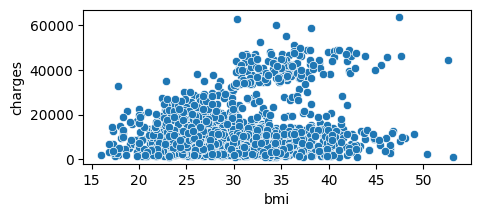

In [ ]:
plt.figure(figsize=(5,2))
sns.scatterplot(data,x='bmi',y='charges')
plt.show()

**How charges vary with Gender**

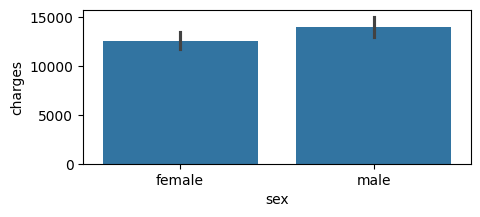

In [ ]:
plt.figure(figsize=(5,2))
sns.barplot(data , x='sex',y='charges')
plt.show()

**How charges vary with smokers**

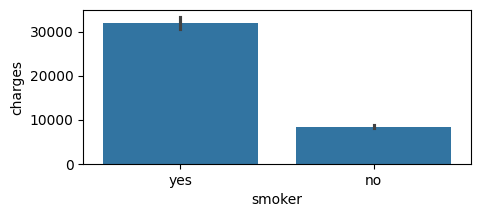

In [ ]:
plt.figure(figsize=(5,2))
sns.barplot(data , x='smoker',y='charges')
plt.show()

**How charges vary with Region**

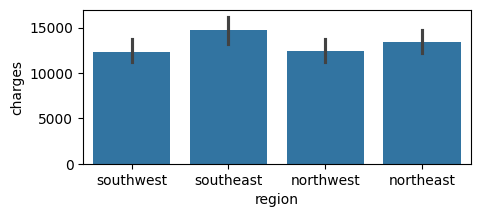

In [ ]:
plt.figure(figsize=(5,2))
sns.barplot(data , x='region',y='charges')
plt.show()

**Pair plot**


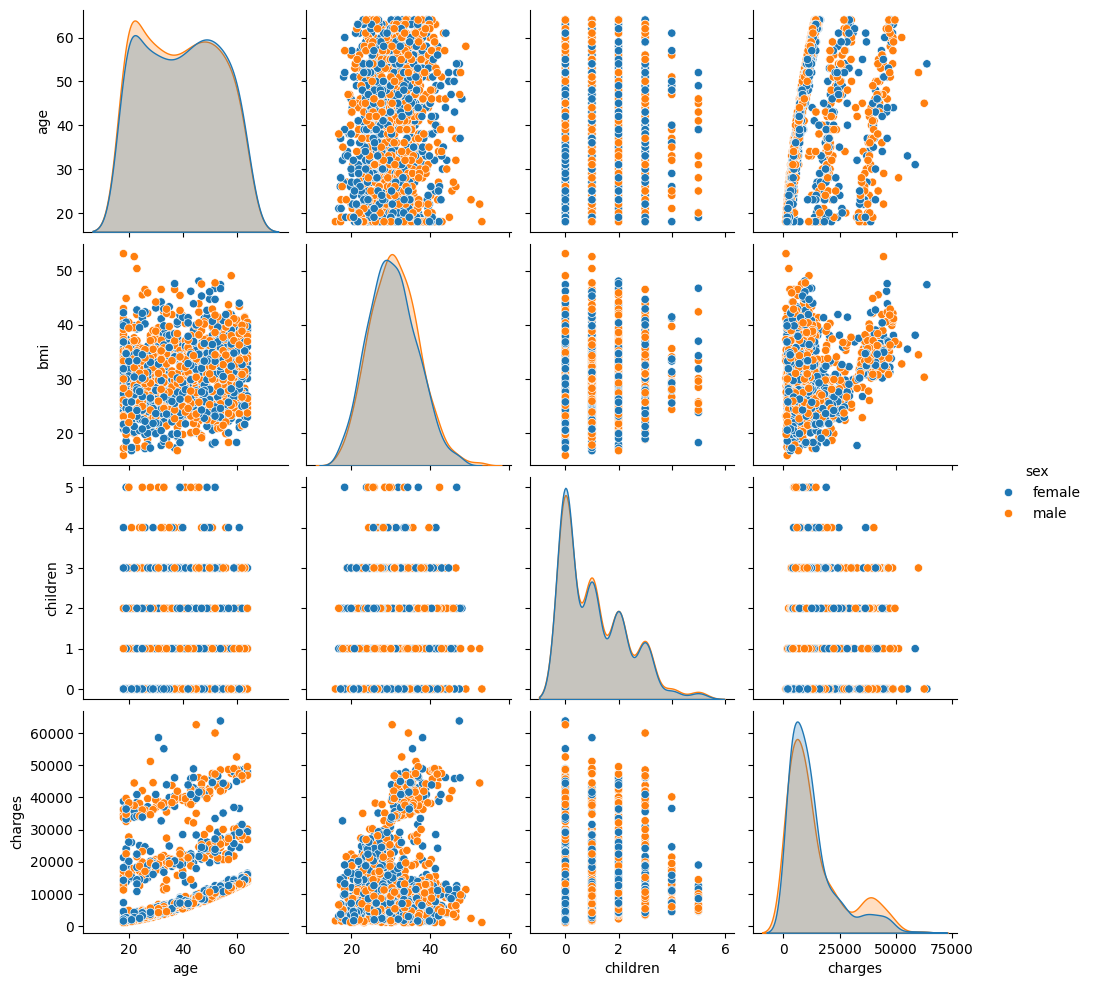

In [ ]:
sns.pairplot(data,hue='sex')

**Heat map**

<Axes: >

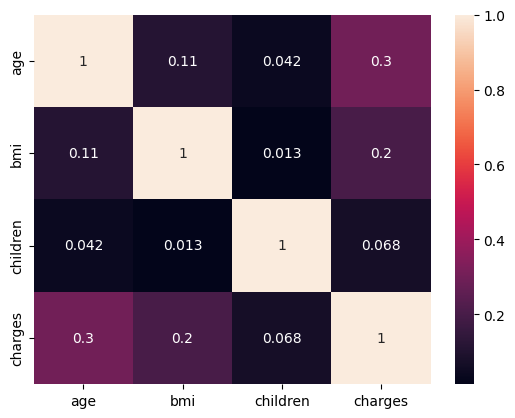

In [ ]:
sns.heatmap(num_data.corr(),annot=True)

### **Handle Outliers**


Outliers are extreme values which are far away from actual data

**check whether Age,bmi,charges has outliers**

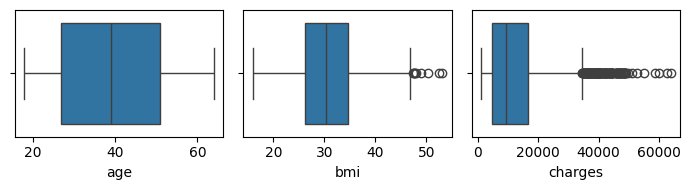

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(7,2))
sns.boxplot(data,x='age',ax=ax[0])
sns.boxplot(data,x='bmi',ax=ax[1])
sns.boxplot(data,x='charges',ax=ax[2])
plt.tight_layout()


There are **outliers** in **bmi and charges**.

**Check the distribution bmi and charges**

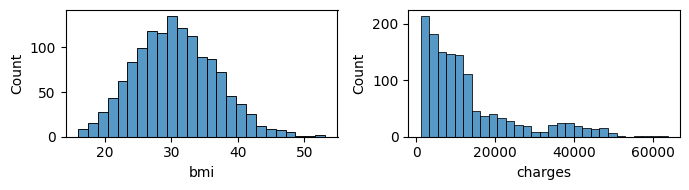

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(7,2))
sns.histplot(data,x='bmi',ax=ax[0])
sns.histplot(data,x='charges',ax=ax[1])
plt.tight_layout()

In [ ]:
# check skewness for bmi and charges
data['bmi'].skew()

np.float64(0.28391419385321137)

In [ ]:
data['charges'].skew()

np.float64(1.5153909108403483)

Clearly shows **bmi** distribution is normal and **charges** distribution is right skewed.

**To find Outliers**
1. IQR - Used when data distribution is skewed.
2. 3 sigma - Used when data distribution is normal.
3. Outliers should be removed / replace only if it is less than 5%.

## **IQR**
**Charges** distribution is skewed will use IQR to find outliers
* find Q1
* find Q3
* find IQR = Q3-Q1
* lower_limit = Q1-1.5*IQR
* upper_limit = Q3+1.5*IQR
* If any value greater than upper limit and less than lower limit we call them like **Outliers**.

In [ ]:
# charges
Q1 = data.loc[:,'charges'].quantile(0.25)
Q3 = data.loc[:,'charges'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
print(Q1,Q3,IQR,lower_limit,upper_limit)

4746.344 16657.71745 11911.37345 -13120.716174999998 34524.777625


In [ ]:
# Filter values which are greater than upper_limit
data[data.loc[:,'charges']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
# Filter values which are less than lower_limit
data[data.loc[:,'charges']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
# find % of outliers
len(data[(data.loc[:,'charges']>upper_limit) | (data.loc[:,'charges']<lower_limit)])/len(data)*100

10.396409872849663

Since percentage of outliers is greater than 5% we are not supposed to touch , here extreme charges are not outliers they are high insurance price for aged people.

## **3 sigma rule**
The distribution of bmi is normal will use 3 sigma rule to find outliers

* find mean
* find standard deviation
* lower_limit = mean - 3*std
* upper_limit = mean + 3*std
* If any value greater than upper limit and less than lower limit , we call them outliers.

In [ ]:
mean_val = data.loc[:,'bmi'].mean()
std_val = data.loc[:,'bmi'].std()
lower_limit = mean_val - 3* std_val
upper_limit = mean_val + 3* std_val

In [ ]:
# filter values greater than upper limit
data[data.loc[:,'bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
# filter values less than lower limit
data[data.loc[:,'bmi']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
# %
len(data[(data.loc[:,'bmi']>upper_limit) | (data.loc[:,'bmi']<lower_limit)])/len(data)*100

0.2991772625280479

In [ ]:
# replaced 0.2% of outliers with mean
data.loc[(data.loc[:,'bmi']>upper_limit)|(data.loc[:,'bmi']<lower_limit),'bmi']=data.loc[:,'bmi'].mean()

In [ ]:
data[data.loc[:,'bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges


### **Converting text data into numerical**
- label encoder
- one hot encoder
- manual encoder
- ordinal encoder

In [ ]:
# label Encoder for smoker(Yes,NO)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.loc[:,'smoker']=le.fit_transform(data.loc[:,'smoker'])

## **One Hot encoding**

In [ ]:
data = pd.get_dummies(data,columns=['sex'],dtype='int64')
data

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,southwest,16884.92400,1,0
1,18,33.770,1,0,southeast,1725.55230,0,1
2,28,33.000,3,0,southeast,4449.46200,0,1
3,33,22.705,0,0,northwest,21984.47061,0,1
4,32,28.880,0,0,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,northwest,10600.54830,0,1
1334,18,31.920,0,0,northeast,2205.98080,1,0
1335,18,36.850,0,0,southeast,1629.83350,1,0
1336,21,25.800,0,0,southwest,2007.94500,1,0


**Region**

In [ ]:
data.loc[:,'region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

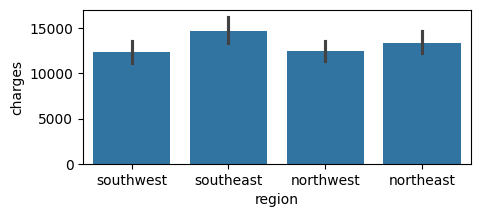

In [ ]:
# relationship between region and charges
plt.figure(figsize=(5,2))
sns.barplot(data,x='region',y='charges')
plt.show()

In [ ]:
# southeast:3 , northeast:2 , northwest:1 , southwest:0
data.loc[:,'region']= data.loc[:,'region'].map({'southeast':3,'northeast':2,'northwest':1,'southwest':0})

In [ ]:
data

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,0,16884.92400,1,0
1,18,33.770,1,0,3,1725.55230,0,1
2,28,33.000,3,0,3,4449.46200,0,1
3,33,22.705,0,0,1,21984.47061,0,1
4,32,28.880,0,0,1,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830,0,1
1334,18,31.920,0,0,2,2205.98080,1,0
1335,18,36.850,0,0,3,1629.83350,1,0
1336,21,25.800,0,0,0,2007.94500,1,0


### **Scaling**
Scaling used to bring values in numerical to a same scale.

Eg: Age and bmi columns values varies lot

# Min max scaler
Transforms all the values into a range of 0 to 1.

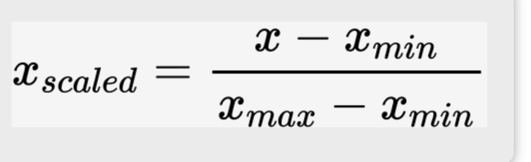

In [ ]:
df1 = data.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [ ]:
# age and bmi
df1[['age']]= min_max.fit_transform(df1[['age']])
df1[['bmi']]= min_max.fit_transform(df1[['bmi']])

## **Standard Scaler**
It transform all the values using below formula so that mean of that column will be 0 and std will be 1


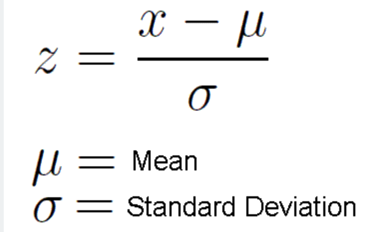

In [ ]:
df2 = data.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['age']]=scaler.fit_transform(df2[['age']])
df2[['bmi']]=scaler.fit_transform(df2[['bmi']])

# **Transformation**
Transformations helps in making the target variable more normally distributed, which can enhance the performance of regression models.


**Log Transformation**

In [ ]:
df2[['charges']]=np.log(df2[['charges']])

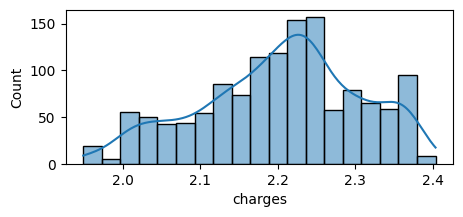

In [ ]:
plt.figure(figsize=(5,2))
sns.histplot(df2,x='charges',kde=True)
plt.show()

### **Feature Engineering**
- Selecting best features
- Drop the columns which are not important
- create new columns

<Axes: >

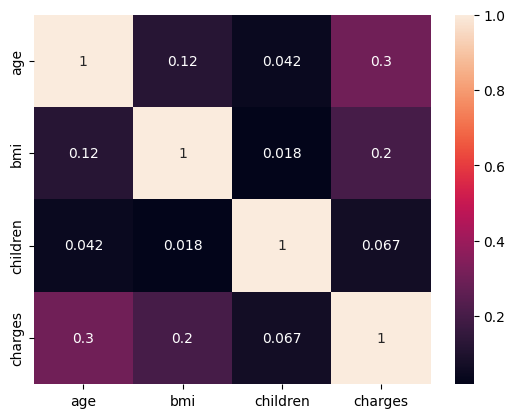

In [ ]:
df = data[['age','bmi','children','charges']]
sns.heatmap(df.corr(),annot=True)

* Columns should have high correlation with target if less we can drop.
* If correlation among input variables is high , we can drop one of the column.

## **Split the data into x and y**

In [ ]:
x = df2.drop(columns='charges') # input features
y = df2.loc[:,'charges'] # output columns

## **Split data for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x.shape

(1337, 7)

In [ ]:
x_train.shape

(1069, 7)

In [ ]:
x_test.shape

(268, 7)

### **Linear Regression Model building**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) #training model

LinearRegression()

In [ ]:
# make predictions
y_pred=model.predict(x_test)

In [ ]:
# slope
model.coef_

array([ 0.05549125,  0.00699567,  0.0121023 ,  0.16468536, -0.00041216,
        0.00458145, -0.00458145])

In [ ]:
# intercept
model.intercept_

np.float64(2.157215569065739)

### **Evaluate the model**
- MSE
- MAE
- RMSE
- MAPE
- r2 score
- adjusted r2 score

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
# Mean squared error
mean_squared_error(y_test,y_pred)

0.0021898467208862266

In [ ]:
# mean absolute error
mean_absolute_error(y_test,y_pred)

0.030512793640374757

In [ ]:
# rmse
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(0.04679579811143546)

In [ ]:
# mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred)

0.013908652060793562

In [ ]:
# r2 score
r2=r2_score(y_test,y_pred)
r2

0.8086159429733626

In [ ]:
n =y_test.shape[0] # number of samples in test data
n

268

In [ ]:
p =x_test.shape[1] # number of inputs
p

7

In [ ]:
# adjusted r2 score
adj = 1- (1-r2)*(n-1)/(n-p-1)
adj

0.8034632952841839